#### Importing Relevant Libraries and Frameworks


In [6]:
# Mounting google drive, for utilizing large data

from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [7]:
# Read / Write access for neuroimaging file formats
!pip install nibabel    

# Traversing through directories and folders & Regular Expression Matching
!pip install os-sys         
!pip install glob3       
!pip install split-folders

# ML/DL Frameworks
!pip install tensorflow 
!pip install torch
!pip install keras
!pip install sklearn
!pip install scipy
!pip install segmentation_models_3D

# Plotting, Visualization and Saving
!pip install matplotlib
!pip install tifffile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached os_sys-2.1.4-py3-none-any.whl (15.6 MB)
  Using cached pygubu-0.31-py3-none-any.whl (118 kB)
  Using cached progress-1.6.tar.gz (7.8 kB)
  Preparing metadata (setup.py) ... done
  Using cached progressbar-2.5.tar.gz (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached Eel-0.16.0.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
  Using cached extract_zip-1.0.0-py3-none-any.whl (2.6 kB)
INFO: pip is looking at multiple versions of os-sys to determine which version is compatible with other requirements. This could take a while.
  Using cached os_sys-2.1.3-py3-none-any.whl (15.5 MB)
  Using cached os_sys-2.1.2-py3-none-any.whl (15.4 MB)
  Using cached os_sys-2.1.1-py3-none-any.whl (15.4 MB)
  Using cached

In [8]:
!pip install split_folders
!pip install segmentation_models_3D
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Importing all of the above

import os
import numpy as np
import nibabel as nib
import glob
import splitfolders
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras
import keras.backend as K
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tifffile import imsave
from scipy.interpolate import RegularGridInterpolator
from sklearn.preprocessing import MinMaxScaler
import segmentation_models_3D as sm
scaler = MinMaxScaler()

#### Data Preprocessing

In [20]:
t1_list = []
t2_list = []
t1ce_list = []
flair_list = []
mask_list = []
for folder in os.listdir("/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"):
    for file in os.listdir("/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/" + folder):
        if (file.endswith("seg.nii")):
            mask_list.append("/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/" + folder + "/" + file)
        if (file.endswith("t1.nii")):
            t1_list.append("/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/" + folder + "/" + file)
        if (file.endswith("t2.nii")):
            t2_list.append("/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/" + folder + "/" + file)
        if (file.endswith("t1ce.nii")):
            t1ce_list.append("/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/" + folder + "/" + file)
        if (file.endswith("flair.nii")):
            flair_list.append("/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/" + folder + "/" + file)
t1_list.sort()
t2_list.sort()
t1ce_list.sort()
flair_list.sort()
mask_list.sort()

In [25]:
print(len(mask_list))

369


In [26]:
print("Paths of Training Data with Index 45 : ")
print("T1 : ", t1_list[45])
print("T2 : ", t2_list[45])
print("T1CE : ", t1ce_list[45])
print("Flair : ", flair_list[45])
print("Mask : ", mask_list[45])

Paths of Training Data with Index 45 : 
T1 :  /content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_046/BraTS20_Training_046_t1.nii
T2 :  /content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_046/BraTS20_Training_046_t2.nii
T1CE :  /content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_046/BraTS20_Training_046_t1ce.nii
Flair :  /content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_046/BraTS20_Training_046_flair.nii
Mask :  /content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_046/BraTS20_Training_046_seg.nii


## Visualizing Data

In [27]:
curr_input = 45
t1_data = nib.load(t1_list[curr_input]).get_fdata()
t1ce_data = nib.load(t1ce_list[curr_input]).get_fdata()
t2_data = nib.load(t2_list[curr_input]).get_fdata()
flair_data = nib.load(flair_list[curr_input]).get_fdata()
combined_data = np.stack([t1_data, t1ce_data, t2_data, flair_data], axis=3)

In [28]:
combined_data.shape

(240, 240, 155, 4)

Plotting 50th Slice of Input Data with Index 45 : 


Text(0.5, 1.0, 'T2 Fluid Attenuated Inversion Recovery (FLAIR)')

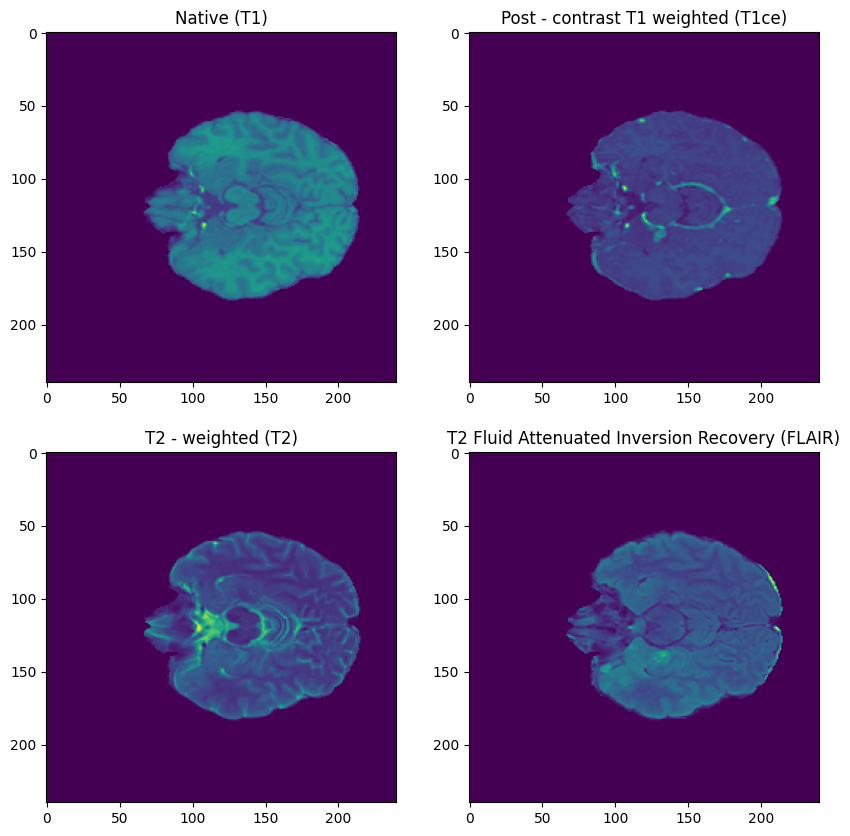

In [29]:
print("Plotting 50th Slice of Input Data with Index 45 : ")
fig, axarr = plt.subplots(2,2)
fig.set_size_inches(10, 10)
axarr[0,0].imshow(combined_data[:, :, 50, 0])
axarr[0,0].set_title('Native (T1)')
axarr[0,1].imshow(combined_data[:, :, 50, 1])
axarr[0,1].set_title('Post - contrast T1 weighted (T1ce)')
axarr[1,0].imshow(combined_data[:, :, 50, 2])
axarr[1,0].set_title('T2 - weighted (T2)')
axarr[1,1].imshow(combined_data[:, :, 50, 3])
axarr[1,1].set_title('T2 Fluid Attenuated Inversion Recovery (FLAIR)')

In [30]:
mask_data = nib.load(mask_list[curr_input]).get_fdata()
mask_data = mask_data.astype(np.uint8)

mask_data[mask_data == 4] = 3 

In [31]:
mask_data.shape

(240, 240, 155)

Text(0.5, 1.0, 'Mask corresponding to Scans')

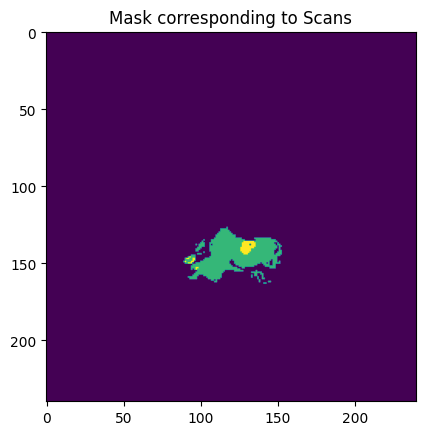

In [32]:
plt.imshow(mask_data[:, :, 50])
plt.title("Mask corresponding to Scans")

In [33]:
combined_data = combined_data[56:184, 56:184, 13:141]
mask_data = mask_data[56:184, 56:184, 13:141]

In [34]:
print(combined_data.shape)
print(mask_data.shape)

(128, 128, 128, 4)
(128, 128, 128)


Plotting 50th Slice (now 37th) of Input Data with Index 45 : 


Text(0.5, 1.0, 'Mask')

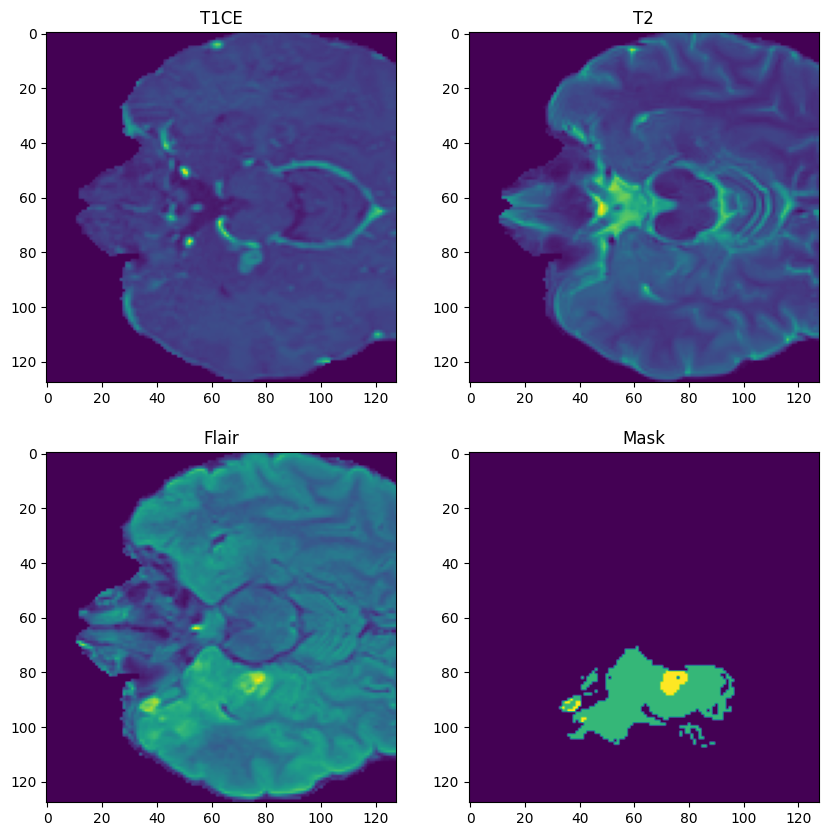

In [35]:
print("Plotting 50th Slice (now 37th) of Input Data with Index 45 : ")
fig, axarr = plt.subplots(2,2)
fig.set_size_inches(10, 10)
axarr[0,0].imshow(combined_data[:, :, 37, 1])
axarr[0,0].set_title('T1CE')
axarr[0,1].imshow(combined_data[:, :, 37, 2])
axarr[0,1].set_title('T2')
axarr[1,0].imshow(combined_data[:, :, 37, 3])
axarr[1,0].set_title('Flair')
axarr[1,1].imshow(mask_data[:, :, 37])
axarr[1,1].set_title('Mask')

In [36]:
val, counts = np.unique(mask_data, return_counts=True)

In [37]:
val, counts

(array([0, 1, 2, 3], dtype=uint8), array([2060810,     163,   34822,    1357]))

In [39]:
num_input_data = len(t1ce_list)
for curr_input in range(0, num_input_data):
    print("Processing Index : ", curr_input)  
    t2_data = nib.load(t2_list[curr_input]).get_fdata()   
    t1ce_data = nib.load(t1ce_list[curr_input]).get_fdata()
    flair_data = nib.load(flair_list[curr_input]).get_fdata()        
    mask_data = nib.load(mask_list[curr_input]).get_fdata()
    mask_data = mask_data.astype(np.uint8)
    mask_data[mask_data == 4] = 3 
    combined_data = np.stack([t1ce_data, t2_data, flair_data], axis=3)
    combined_data = combined_data[56:184, 56:184, 13:141]
    mask_data = mask_data[56:184, 56:184, 13:141]
    val, counts = np.unique(mask_data, return_counts=True)
    if (1 - (counts[0]/counts.sum())) > 0.05:  #At least 3% useful volume with labels that are not 0
        print("Saving Index ", curr_input)
        mask_data = to_categorical(mask_data, num_classes=4)
        np.save('/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(curr_input)+'.npy', combined_data)
        np.save('/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(curr_input)+'.npy', mask_data) 

Processing Index :  0
Saving Index  0
Processing Index :  1
Processing Index :  2
Processing Index :  3
Processing Index :  4
Processing Index :  5
Saving Index  5
Processing Index :  6
Processing Index :  7
Processing Index :  8
Saving Index  8
Processing Index :  9
Processing Index :  10
Processing Index :  11
Processing Index :  12
Processing Index :  13
Processing Index :  14
Saving Index  14
Processing Index :  15
Saving Index  15
Processing Index :  16
Processing Index :  17
Processing Index :  18
Processing Index :  19
Saving Index  19
Processing Index :  20
Processing Index :  21
Processing Index :  22
Processing Index :  23
Processing Index :  24
Processing Index :  25
Saving Index  25
Processing Index :  26
Processing Index :  27
Processing Index :  28
Processing Index :  29
Processing Index :  30
Processing Index :  31
Processing Index :  32
Saving Index  32
Processing Index :  33
Processing Index :  34
Processing Index :  35
Processing Index :  36
Saving Index  36
Processin

In [41]:
input_folder = '/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/input_data_3channels/'
output_folder = '/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/input_data_128/'
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Copying files: 296 files [02:58,  1.66 files/s]


#### Understanding and Visualizing Dataset

In [44]:
# Defining root directories for Images and Masks

train_img_dir = "/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "/content/drive/Shareddrives/cs231n_final/cs231n_baseline/BraTS2020/BraTS2020_TrainingData/input_data_128/train/masks/"

In [45]:
# Collecting Data into NumPy arrays

images = []
masks = []

index = 0
for file in os.listdir(train_img_dir):
    index += 1
    if (index == 30):
        break
    images.append(np.load(train_img_dir + file))
    mask = np.load(train_mask_dir + "mask_" + file[6:])
    
    # Combining the 4 Different Scans available into 1.  
    mask = np.argmax(mask, axis=3)
    masks.append(mask)

images = np.array(images)
masks = np.array(masks)

In [87]:
# Understanding Dimensions of Data

print("Shape of Images Data : ", images.shape)
print("Shape of Classification Labels corresponding to them : ", masks.shape)

Shape of Images Data :  (29, 128, 128, 128, 3)
Shape of Classification Labels corresponding to them :  (29, 128, 128, 128)


In [88]:
# Cross-referencing, as expected, the masks can values out of 0, 1, 2 & 3.

print("Values of Classification Labels can be : ", np.unique(masks.flatten()))

Values of Classification Labels can be :  [0 1 2 3]


In [89]:
# Define a regrid() function, that helps in resizing an image
# based on interpolation of pixels.

def regrid(data, out_x, out_y):
    m = max(data.shape[0], data.shape[1])
    y = np.linspace(0, 1.0/m, data.shape[0])
    x = np.linspace(0, 1.0/m, data.shape[1])
    interpolating_function = RegularGridInterpolator((y, x), data)

    yv, xv = np.meshgrid(np.linspace(0, 1.0/m, out_y), np.linspace(0, 1.0/m, out_x))

    return interpolating_function((xv, yv))

In [90]:
# Due to limited computation resources, we minimize the size
# of each image in the 3D Volume from 256 x 256 to 64 x 64.

minimized_size = 64

small_images = []
small_masks = []

for i in range(0, len(images)):
    image = images[i]
    mask = masks[i]
    curr_image = []
    curr_mask = []
    
    for z in range(0, 128):
        image_z_0 = image[:, :, z, 0]
        image_z_1 = image[:, :, z, 1]
        image_z_2 = image[:, :, z, 2]
        image_z_0 = regrid(image_z_0, minimized_size, minimized_size)
        image_z_1 = regrid(image_z_1, minimized_size, minimized_size)
        image_z_2 = regrid(image_z_2, minimized_size, minimized_size)
        curr_depth = np.stack([image_z_0, image_z_1, image_z_2])
        curr_depth = np.moveaxis(curr_depth, -1, 0)
        curr_depth = np.moveaxis(curr_depth, -1, 0)
        curr_image.append(curr_depth)
        mask_z = mask[:, :, z]
        mask_z = np.array(np.round(regrid(mask_z, minimized_size, minimized_size)), dtype = 'uint8')
        curr_mask.append(mask_z)
    
    small_images.append(np.array(curr_image))
    small_masks.append(np.array(curr_mask))

small_images = np.array(small_images)
small_masks = np.array(small_masks)

In [91]:
# Understanding Dimensions of Processed Data

print("Shape of Images Data : ", small_images.shape)
print("Shape of Classification Labels corresponding to them : ", small_masks.shape)

Shape of Images Data :  (29, 128, 64, 64, 3)
Shape of Classification Labels corresponding to them :  (29, 128, 64, 64)


Text(0.5, 1.0, 'Output Classification')

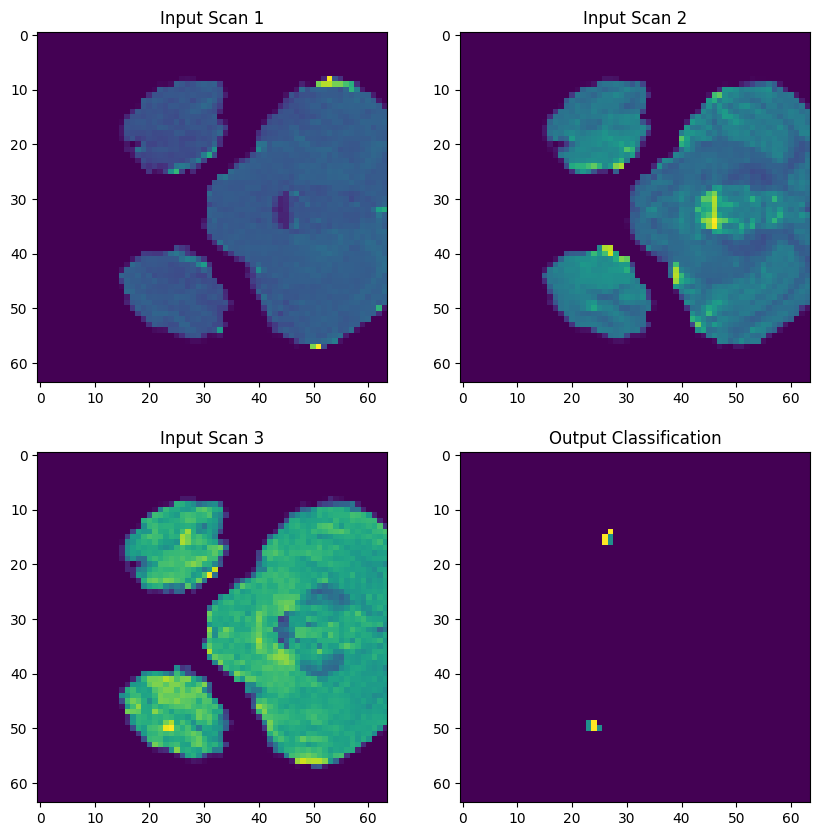

In [51]:
# Plotting Input Image Slices and the given Classification Mask
from matplotlib.pyplot import figure

fig, axarr = plt.subplots(2,2)
fig.set_size_inches(10, 10)
axarr[0,0].imshow(small_images[0, 28, :, :, 0])
axarr[0,0].set_title('Input Scan 1')
axarr[0,1].imshow(small_images[0, 28, :, :, 1])
axarr[0,1].set_title('Input Scan 2')
axarr[1,0].imshow(small_images[0, 28, :, :, 2])
axarr[1,0].set_title('Input Scan 3')
axarr[1,1].imshow(small_masks[0, 28, :, :])
axarr[1,1].set_title('Output Classification')

In [92]:
categorical_example = to_categorical(small_masks[0, 28, :, :], num_classes = 4)

In [93]:
categorical_example[:, :, 0].shape

(64, 64)

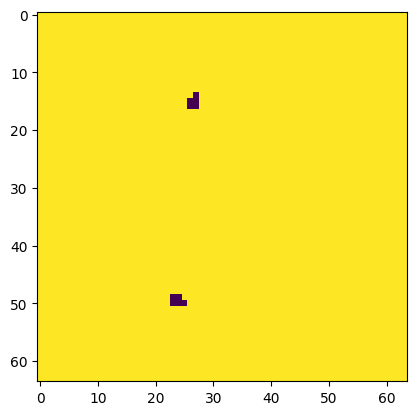

In [54]:
plt.imshow(categorical_example[:, :, 0])

Text(0.5, 1.0, 'GD-enhancing tumor')

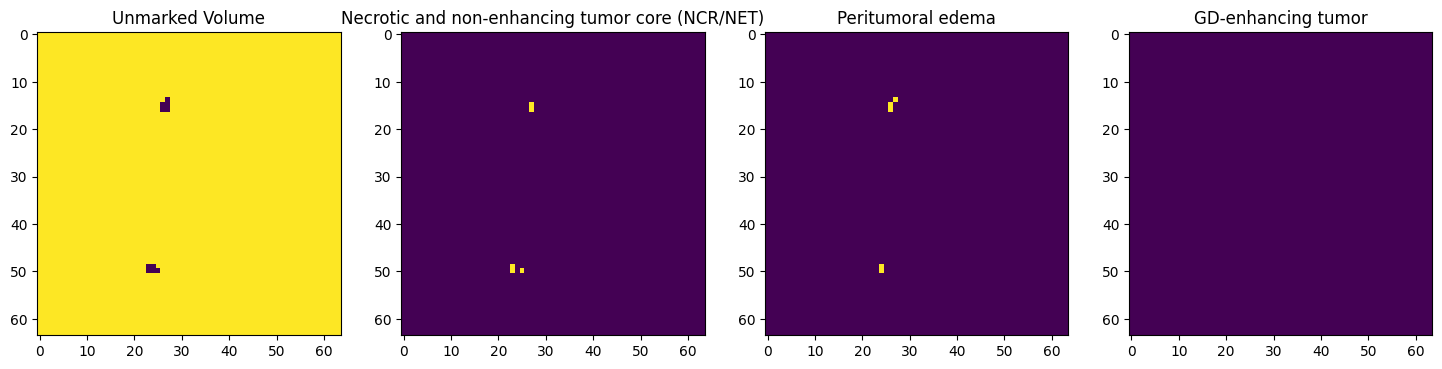

In [55]:
fig, axarr = plt.subplots(1, 4)
fig.set_size_inches(18, 10)
axarr[0].imshow(categorical_example[:, :, 0])
axarr[0].set_title('Unmarked Volume')
axarr[1].imshow(categorical_example[:, :, 1])
axarr[1].set_title('Necrotic and non-enhancing tumor core (NCR/NET)')
axarr[2].imshow(categorical_example[:, :, 2])
axarr[2].set_title('Peritumoral edema')
axarr[3].imshow(categorical_example[:, :, 3])
axarr[3].set_title('GD-enhancing tumor')

In [94]:
# Dividing Processed Scans into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (small_images,
                                                     small_masks,
                                                     test_size=0.15,
                                                     shuffle=True)

In [75]:
# Converting 3D Scans to 2D Scans, to pass through traditional 2D U-Net

X_train = np.array(X_train.reshape(X_train.shape[0] * 128, minimized_size, minimized_size, 3))
y_train = np.array(y_train.reshape(y_train.shape[0] * 128, minimized_size, minimized_size))
y_train_cat = to_categorical(y_train, num_classes = 4)
X_test = np.array(X_test.reshape(X_test.shape[0] * 128, minimized_size, minimized_size, 3))
y_test = np.array(y_test.reshape(y_test.shape[0] * 128, minimized_size, minimized_size))
y_test_cat = to_categorical(y_test, num_classes = 4)

In [95]:
# Understanding Dimensions of Processed Data

print("Training Data Input Shape : ", X_train.shape)
print("Training Data Output Shape : ", y_train_cat.shape)

print(" ")

print("Testing Data Input Shape : ", X_test.shape)
print("Testing Data Output Shape : ", y_test_cat.shape)

Training Data Input Shape :  (24, 128, 64, 64, 3)
Training Data Output Shape :  (3072, 64, 64, 4)
 
Testing Data Input Shape :  (5, 128, 64, 64, 3)
Testing Data Output Shape :  (640, 64, 64, 4)


Text(0.5, 1.0, 'Class Label : 3')

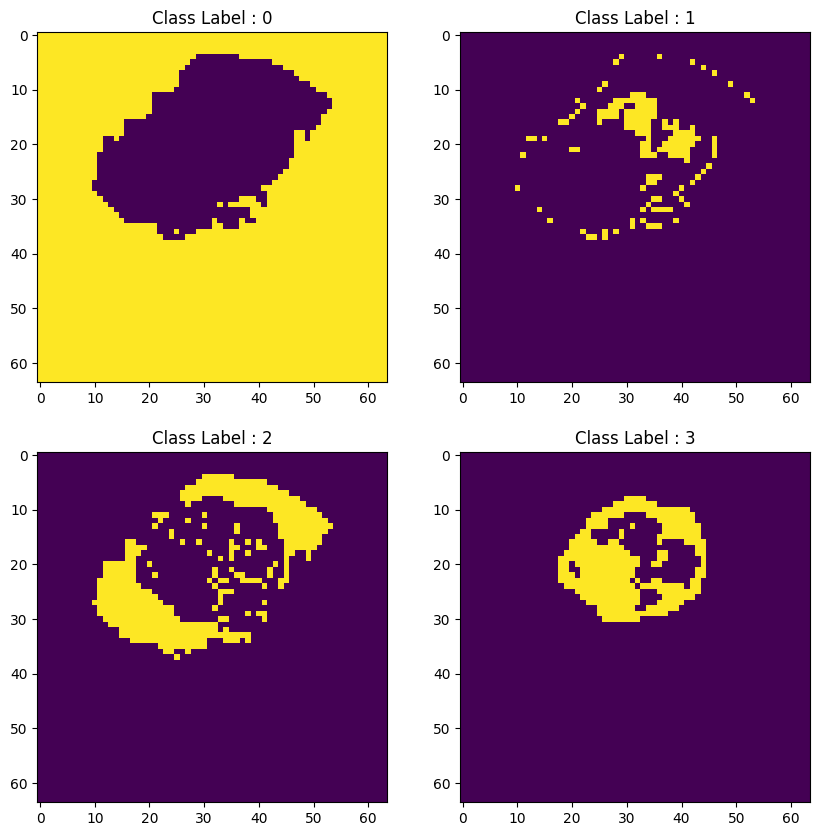

In [77]:
# Plotting Input Image Slices and the given Classification Mask

fig, axarr = plt.subplots(2,2)
fig.set_size_inches(10, 10)
axarr[0,0].imshow(y_train_cat[64, :, :, 0])
axarr[0,0].set_title('Class Label : 0')
axarr[0,1].imshow(y_train_cat[64, :, :, 1])
axarr[0,1].set_title('Class Label : 1')
axarr[1,0].imshow(y_train_cat[64, :, :, 2])
axarr[1,0].set_title('Class Label : 2')
axarr[1,1].imshow(y_train_cat[64, :, :, 3])
axarr[1,1].set_title('Class Label : 3')

In [78]:
def standardUNet2D (num_classes = 4, img_h = 64, img_w = 64, img_ch = 3):
    
    input = keras.layers.Input((img_h, img_w, img_ch))
    
    conv_1 = keras.layers.Conv2D (16, (3, 3), activation = 'relu', padding = 'same') (input)
    conv_1 = keras.layers.Dropout (0.1) (conv_1)
    conv_1 = keras.layers.Conv2D (16, (3, 3), activation = 'relu', padding = 'same') (input)
    pool_1 = keras.layers.MaxPooling2D ((2, 2)) (conv_1)

    conv_2 = keras.layers.Conv2D (32, (3, 3), activation = 'relu', padding = 'same') (pool_1)
    conv_2 = keras.layers.Dropout (0.1) (conv_2)
    conv_2 = keras.layers.Conv2D (32, (3, 3), activation = 'relu', padding = 'same') (conv_2)
    pool_2 = keras.layers.MaxPooling2D ((2, 2)) (conv_2)

    conv_3 = keras.layers.Conv2D (64, (3, 3), activation = 'relu', padding = 'same') (pool_2)
    conv_3 = keras.layers.Dropout (0.2) (conv_3)
    conv_3 = keras.layers.Conv2D (64, (3, 3), activation = 'relu', padding = 'same') (conv_3)
    pool_3 = keras.layers.MaxPooling2D ((2, 2)) (conv_3)

    conv_4 = keras.layers.Conv2D (128, (3, 3), activation = 'relu', padding = 'same') (pool_3)
    conv_4 = keras.layers.Dropout (0.2) (conv_4)
    conv_4 = keras.layers.Conv2D (128, (3, 3), activation = 'relu', padding = 'same') (conv_4)
    pool_4 = keras.layers.MaxPooling2D ((2, 2)) (conv_4)

    conv_5 = keras.layers.Conv2D (256, (3, 3), activation = 'relu', padding = 'same') (pool_4)
    conv_5 = keras.layers.Dropout (0.3) (conv_5)
    conv_5 = keras.layers.Conv2D (256, (3, 3), activation = 'relu', padding = 'same') (conv_5)

    upsample_6 = keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv_5)
    upsample_6 = keras.layers.concatenate([upsample_6, conv_4])
    conv_6 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(upsample_6)
    conv_6 = keras.layers.Dropout(0.2)(conv_6)
    conv_6 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv_6)

    upsample_7 = keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv_6)
    upsample_7 = keras.layers.concatenate([upsample_7, conv_3])
    conv_7 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(upsample_7)
    conv_7 = keras.layers.Dropout(0.2)(conv_7)
    conv_7 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv_7)

    upsample_8 = keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv_7)
    upsample_8 = keras.layers.concatenate([upsample_8, conv_2])
    conv_8 = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(upsample_8)
    conv_8 = keras.layers.Dropout(0.1)(conv_8)
    conv_8 = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv_8)
    
    upsample_9 = keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(conv_8)
    upsample_9 = keras.layers.concatenate([upsample_9, conv_1])
    conv_9 = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(upsample_9)
    conv_9 = keras.layers.Dropout(0.1)(conv_9)
    conv_9 = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(conv_9)

    outputs = keras.layers.Conv2D(num_classes, (1, 1), activation='softmax')(conv_9)

    model = keras.models.Model(inputs=[input], outputs=[outputs])
    
    return model

In [79]:
standardUNet2D().summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 16)   448         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 16)   0           ['conv2d_1[0][0]']               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 32, 32, 32)   4640        ['max_pooling2d[0][0]']          
                                                                                            

In [80]:
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.CategoricalFocalLoss()
alpha = 0.5

total_loss = dice_loss + alpha * focal_loss
metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]
LR = 0.01

In [81]:
standardUNet2D_Model = standardUNet2D()
standardUNet2D_Model.compile (optimizer = 'adam', 
                              loss = 'categorical_crossentropy', 
                              metrics = metrics)

standardUNet2D_Model_history = standardUNet2D_Model.fit(X_train, y_train_cat, 
                                    batch_size = 64, 
                                    verbose=1, 
                                    epochs=50, 
                                    validation_data=(X_test, y_test_cat),
                                    shuffle=True)

Epoch 1/50
 9/48 [====>.........................] - ETA: 2s - loss: 120.7101 - accuracy: 0.5606 - iou_score: 0.4297

KeyboardInterrupt: ignored

In [82]:
#Define parameters for our model.
import tensorflow 

encoder_weights = 'imagenet'
BACKBONE = 'vgg16'  #Try vgg16, efficientnetb7, inceptionv3, resnet50
activation = 'softmax'
patch_size = 64
n_classes = 4
channels=3

LR = 0.0001
optim = tensorflow.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.1, 0.3, 0.3, 0.3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [83]:
preprocess_input = sm.get_preprocessing(BACKBONE)

In [84]:
#Preprocess input data - otherwise you end up with garbage resutls 
# and potentially model that does not converge.
X_train_prep = preprocess_input(X_train)
X_test_prep = preprocess_input(X_test)

In [85]:
#Define the model. Here we use Unet but we can also use other model architectures from the library.
model = sm.Unet(BACKBONE, classes=n_classes, 
                input_shape=(128, patch_size, patch_size, channels), 
                encoder_weights=encoder_weights,
                activation=activation)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

176606448/176606448 [==============================] - 3s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 64, 64  0           []                               
                                , 3)]                                                             
                                                                                                  
 block1_conv1 (Conv3D)          (None, 128, 64, 64,  5248        ['input_4[0][0]']                
                                 64)                                                              
                                                                                                  
 block1_conv2 (Conv3D)          (None, 128, 64, 64,  110656      ['block1_conv1[0][0]']           
                         

In [86]:
#Fit the model
history=model.fit(X_train_prep, 
          y_train_cat,
          batch_size=4, 
          epochs=100,
          verbose=1,
          validation_data=(X_test_prep, y_test_cat))

Epoch 1/100


ValueError: ignored

In [ ]:
def ResidualConvBlock(input, num_filters):
    conv_a = keras.layers.Conv2D(num_filters, (3, 3), padding='same')(input)
    conv_a = keras.layers.BatchNormalization(axis=3)(conv_a)
    conv_a = keras.layers.Activation('relu') (conv_a)

    conv_b = keras.layers.Conv2D(num_filters, (3, 3), padding='same')(conv_a)
    conv_b = keras.layers.BatchNormalization(axis=3)(conv_b)

    residual_conv = keras.layers.Conv2D(num_filters, kernel_size=(1, 1), padding='same')(input)
    residual_conv = keras.layers.BatchNormalization(axis=3)(residual_conv)

    result = keras.layers.add([residual_conv, conv_b])
    result = keras.layers.Activation('relu')(result)
    
    return result

In [ ]:
def AttentionBlock(input, output_size, upsample_conv_block):
    conv_gate = keras.layers.Conv2D(output_size, (1, 1), padding='same')(input)
    conv_gate = keras.layers.BatchNormalization()(conv_gate)
    conv_gate = keras.layers.Activation('relu')(conv_gate)

    shape_upsample_conv_block = K.int_shape(upsample_conv_block)
    shape_conv_gate = K.int_shape(conv_gate)

    # Getting the x signal to the same shape as the gating signal
    upsample_conv_block_theta = keras.layers.Conv2D(output_size, (2, 2), strides=(2, 2), padding='same')(upsample_conv_block)
    shape_upsample_conv_block_theta = K.int_shape(upsample_conv_block_theta)

    # Getting the gating signal to the same number of filters as the inter_shape
    conv_gate = keras.layers.Conv2D(output_size, (1, 1), padding='same')(conv_gate)
    upsample_conv_gate = keras.layers.Conv2DTranspose(output_size, (3, 3), strides=(shape_upsample_conv_block_theta[1] // shape_conv_gate[1], shape_upsample_conv_block_theta[2] // shape_conv_gate[2]), padding='same')(conv_gate)

    concat_upsample_conv_gate = keras.layers.add([upsample_conv_gate, upsample_conv_block_theta])
    concat_upsample_conv_gate = keras.layers.Activation('relu')(concat_upsample_conv_gate)
    concat_upsample_conv_gate = keras.layers.Conv2D(1, (1, 1), padding='same')(concat_upsample_conv_gate)
    concat_upsample_conv_gate = keras.layers.Activation('sigmoid')(concat_upsample_conv_gate)
    shape_concat_upsample_conv_gate = K.int_shape(concat_upsample_conv_gate)    
    concat_upsample_conv_gate = keras.layers.UpSampling2D(size=(shape_upsample_conv_block[1] // shape_concat_upsample_conv_gate[1], shape_upsample_conv_block[2] // shape_concat_upsample_conv_gate[2]))(concat_upsample_conv_gate)
    concat_upsample_conv_gate = keras.layers.Lambda(lambda x, repnum: K.repeat_elements(x, shape_upsample_conv_block[3], axis=3),
                          arguments={'repnum': shape_upsample_conv_block[3]})(concat_upsample_conv_gate)
    
    result = keras.layers.multiply([concat_upsample_conv_gate, upsample_conv_block])
    result = keras.layers.Conv2D(shape_upsample_conv_block[3], (1, 1), padding='same')(result)
    result = keras.layers.BatchNormalization()(result)

    return result

In [ ]:
def AttentionResUNet(img_h = 64, img_w = 64, img_ch = 3):
    input = keras.layers.Input((img_h, img_w, img_ch), dtype=tf.float32)
    
    res_conv_1 = ResidualConvBlock(input, 64)
    pool_1 = keras.layers.MaxPooling2D(pool_size=(2,2))(res_conv_1)

    res_conv_2 = ResidualConvBlock(pool_1, 128)
    pool_2 = keras.layers.MaxPooling2D(pool_size=(2,2))(res_conv_2)

    res_conv_3 = ResidualConvBlock(pool_2, 256)
    pool_3 = keras.layers.MaxPooling2D(pool_size=(2,2))(res_conv_3)

    res_conv_4 = ResidualConvBlock(pool_3, 512)
    pool_4 = keras.layers.MaxPooling2D(pool_size=(2,2))(res_conv_4)

    res_conv_5 = ResidualConvBlock(pool_4, 1024)

    att_1 = AttentionBlock(res_conv_5, 512, res_conv_4)
    up_conv_1 = keras.layers.UpSampling2D(size=(2, 2), data_format="channels_last")(res_conv_5)
    up_conv_1 = keras.layers.concatenate([up_conv_1, att_1], axis = 3)
    up_residual_conv_1 = ResidualConvBlock(up_conv_1, 512)
    
    att_2 = AttentionBlock(up_conv_1, 256, res_conv_3)
    up_conv_2 = keras.layers.UpSampling2D(size=(2, 2), data_format="channels_last")(up_residual_conv_1)
    up_conv_2 = keras.layers.concatenate([up_conv_2, att_2], axis = 3)
    up_residual_conv_2 = ResidualConvBlock(up_conv_2, 256)

    att_3 = AttentionBlock(up_conv_2, 128, res_conv_2)
    up_conv_3 = keras.layers.UpSampling2D(size=(2, 2), data_format="channels_last")(up_residual_conv_2)
    up_conv_3 = keras.layers.concatenate([up_conv_3, att_3], axis = 3)
    up_residual_conv_3 = ResidualConvBlock(up_conv_3, 128)

    att_4 = AttentionBlock(up_conv_3, 64, res_conv_1)
    up_conv_4 = keras.layers.UpSampling2D(size=(2, 2), data_format="channels_last")(up_residual_conv_3)
    up_conv_4 = keras.layers.concatenate([up_conv_4, att_4], axis = 3)
    up_residual_conv_4 = ResidualConvBlock(up_conv_4, 64)
    
    output = keras.layers.Conv2D(4, kernel_size=(1,1))(up_residual_conv_4)
    output = keras.layers.BatchNormalization(axis=3)(output)
    output = keras.layers.Activation('softmax')(output)

    model = keras.models.Model(input, output)
    return model

In [ ]:
att_res_unet_model = AttentionResUNet()
print(att_res_unet_model.summary())

In [ ]:
AttentionResUNet2D_Model = AttentionResUNet()
AttentionResUNet2D_Model.compile (optimizer = 'adam', 
                              loss = 'categorical_crossentropy', 
                              metrics = metrics)

AttentionResUNet2D_Model_history = AttentionResUNet2D_Model.fit(X_train, y_train_cat, 
                                    batch_size = 64, 
                                    verbose = 1, 
                                    epochs = 50, 
                                    validation_data = (X_test, y_test_cat),
                                    shuffle = True)

In [96]:
def ResidualConvBlock3D(input, num_filters):
    conv_a = keras.layers.Conv3D(num_filters, (2, 2, 2), padding='same')(input)
    conv_a = keras.layers.BatchNormalization(axis = 4)(conv_a)
    conv_a = keras.layers.Activation('relu') (conv_a)

    conv_b = keras.layers.Conv3D(num_filters, (2, 2, 2), padding='same')(conv_a)
    conv_b = keras.layers.BatchNormalization(axis = 4)(conv_b)

    residual_conv = keras.layers.Conv3D(num_filters, kernel_size=(1, 1, 1), padding='same')(input)
    residual_conv = keras.layers.BatchNormalization(axis = 4)(residual_conv)

    result = keras.layers.add([residual_conv, conv_b])
    result = keras.layers.Activation('relu')(result)
    
    return result

In [97]:
def AttentionBlock3D(input, output_size, upsample_conv_block):
    conv_gate = keras.layers.Conv3D(output_size, (1, 1, 1), padding='same')(input)
    conv_gate = keras.layers.BatchNormalization()(conv_gate)
    conv_gate = keras.layers.Activation('relu')(conv_gate)

    shape_upsample_conv_block = K.int_shape(upsample_conv_block)
    shape_conv_gate = K.int_shape(conv_gate)

    # Getting the x signal to the same shape as the gating signal
    upsample_conv_block_theta = keras.layers.Conv3D(output_size, (2, 2, 2), strides=(2, 2, 2), padding='same')(upsample_conv_block)
    shape_upsample_conv_block_theta = K.int_shape(upsample_conv_block_theta)

    # Getting the gating signal to the same number of filters as the inter_shape
    conv_gate = keras.layers.Conv3D(output_size, (2, 2, 2), padding='same')(conv_gate)
    upsample_conv_gate = keras.layers.Conv3DTranspose(output_size, (2, 2, 2), strides=(shape_upsample_conv_block_theta[1] // shape_conv_gate[1], shape_upsample_conv_block_theta[2] // shape_conv_gate[2], shape_upsample_conv_block_theta[3] // shape_conv_gate[3]), padding='same')(conv_gate)

    concat_upsample_conv_gate = keras.layers.add([upsample_conv_gate, upsample_conv_block_theta])
    concat_upsample_conv_gate = keras.layers.Activation('relu')(concat_upsample_conv_gate)
    concat_upsample_conv_gate = keras.layers.Conv3D(1, (2, 2, 2), padding='same')(concat_upsample_conv_gate)
    concat_upsample_conv_gate = keras.layers.Activation('sigmoid')(concat_upsample_conv_gate)
    shape_concat_upsample_conv_gate = K.int_shape(concat_upsample_conv_gate)    
    concat_upsample_conv_gate = keras.layers.UpSampling3D(size=(shape_upsample_conv_block[1] // shape_concat_upsample_conv_gate[1], shape_upsample_conv_block[2] // shape_concat_upsample_conv_gate[2], shape_upsample_conv_block[3] // shape_concat_upsample_conv_gate[3]))(concat_upsample_conv_gate)
    concat_upsample_conv_gate = keras.layers.Lambda(lambda x, repnum: K.repeat_elements(x, shape_upsample_conv_block[4], axis = 4),
                          arguments={'repnum': shape_upsample_conv_block[4]})(concat_upsample_conv_gate)
    
    result = keras.layers.multiply([concat_upsample_conv_gate, upsample_conv_block])
    result = keras.layers.Conv3D(shape_upsample_conv_block[4], (1, 1, 1), padding='same')(result)
    result = keras.layers.BatchNormalization()(result)

    return result

In [98]:
def AttentionResUNet3D(img_z = 128, img_h = 64, img_w = 64, img_ch = 3):
    input = keras.layers.Input((img_z, img_h, img_w, img_ch), dtype=tf.float32)
    
    res_conv_1 = ResidualConvBlock3D(input, 64)
    pool_1 = keras.layers.MaxPooling3D(pool_size=(2,2,2))(res_conv_1)

    res_conv_2 = ResidualConvBlock3D(pool_1, 128)
    pool_2 = keras.layers.MaxPooling3D(pool_size=(2,2,2))(res_conv_2)

    res_conv_3 = ResidualConvBlock3D(pool_2, 256)
    pool_3 = keras.layers.MaxPooling3D(pool_size=(2,2,2))(res_conv_3)

    res_conv_4 = ResidualConvBlock3D(pool_3, 512)
    pool_4 = keras.layers.MaxPooling3D(pool_size=(2,2,2))(res_conv_4)

    res_conv_5 = ResidualConvBlock3D(pool_4, 1024)

    att_1 = AttentionBlock3D(res_conv_5, 512, res_conv_4)
    up_conv_1 = keras.layers.UpSampling3D(size=(2, 2, 2), data_format="channels_last")(res_conv_5)
    up_conv_1 = keras.layers.concatenate([up_conv_1, att_1], axis = 4)
    up_residual_conv_1 = ResidualConvBlock3D(up_conv_1, 512)
    
    att_2 = AttentionBlock3D(up_conv_1, 256, res_conv_3)
    up_conv_2 = keras.layers.UpSampling3D(size=(2, 2, 2), data_format="channels_last")(up_residual_conv_1)
    up_conv_2 = keras.layers.concatenate([up_conv_2, att_2], axis = 4)
    up_residual_conv_2 = ResidualConvBlock3D(up_conv_2, 256)

    att_3 = AttentionBlock3D(up_conv_2, 128, res_conv_2)
    up_conv_3 = keras.layers.UpSampling3D(size=(2, 2, 2), data_format="channels_last")(up_residual_conv_2)
    up_conv_3 = keras.layers.concatenate([up_conv_3, att_3], axis = 4)
    up_residual_conv_3 = ResidualConvBlock3D(up_conv_3, 128)

    att_4 = AttentionBlock3D(up_conv_3, 64, res_conv_1)
    up_conv_4 = keras.layers.UpSampling3D(size=(2, 2, 2), data_format="channels_last")(up_residual_conv_3)
    up_conv_4 = keras.layers.concatenate([up_conv_4, att_4], axis = 4)
    up_residual_conv_4 = ResidualConvBlock3D(up_conv_4, 64)
    
    output = keras.layers.Conv3D(4, kernel_size=(1, 1,1))(up_residual_conv_4)
    output = keras.layers.BatchNormalization(axis = 4)(output)
    output = keras.layers.Activation('softmax')(output)

    model = keras.models.Model(input, output)
    return model

In [99]:
AttentionResUNet3D().summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 64, 64  0           []                               
                                , 3)]                                                             
                                                                                                  
 conv3d_48 (Conv3D)             (None, 128, 64, 64,  1600        ['input_5[0][0]']                
                                 64)                                                              
                                                                                                  
 batch_normalization_36 (BatchN  (None, 128, 64, 64,  256        ['conv3d_48[0][0]']              
 ormalization)                   64)                                                        

In [100]:
y_train_cat = to_categorical(y_train, num_classes = 4)
y_test_cat = to_categorical(y_test, num_classes = 4)

In [101]:
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.CategoricalFocalLoss()
alpha = 0.5

total_loss = dice_loss + alpha * focal_loss
metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]
LR = 0.01

In [102]:
X_train.shape

(24, 128, 64, 64, 3)

In [103]:
y_train.shape

(24, 128, 64, 64)

In [104]:
AttentionResUNet3D_Model = AttentionResUNet3D()

In [105]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
AttentionResUNet3D_Model.compile (optimizer = opt, 
                              loss = total_loss, 
                              metrics = metrics)

AttentionResUNet3D_Model_history = AttentionResUNet3D_Model.fit(X_train, y_train_cat, 
                                    batch_size = 1, 
                                    verbose = 1, 
                                    epochs = 1000, 
                                    validation_data = (X_test, y_test_cat),
                                    shuffle = True)

Epoch 1/1000
24/24 [==============================] - 75s 877ms/step - loss: 0.8082 - accuracy: 0.6845 - iou_score: 0.2502 - val_loss: 1.4905 - val_accuracy: 0.0128 - val_iou_score: 0.0034
Epoch 2/1000
24/24 [==============================] - 19s 806ms/step - loss: 0.7583 - accuracy: 0.7931 - iou_score: 0.3647 - val_loss: 1.4830 - val_accuracy: 0.0128 - val_iou_score: 0.0032
Epoch 3/1000
24/24 [==============================] - 20s 815ms/step - loss: 0.7216 - accuracy: 0.8425 - iou_score: 0.4301 - val_loss: 0.9314 - val_accuracy: 0.4806 - val_iou_score: 0.0995
Epoch 4/1000
24/24 [==============================] - 19s 814ms/step - loss: 0.6905 - accuracy: 0.8752 - iou_score: 0.4575 - val_loss: 0.7840 - val_accuracy: 0.8167 - val_iou_score: 0.2188
Epoch 5/1000
24/24 [==============================] - 20s 831ms/step - loss: 0.6644 - accuracy: 0.8999 - iou_score: 0.4770 - val_loss: 0.8960 - val_accuracy: 0.4354 - val_iou_score: 0.1209
Epoch 6/1000
24/24 [==============================] - 2